<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-используемых-библиотек" data-toc-modified-id="Импорт-используемых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт используемых библиотек</a></span></li><li><span><a href="#Чтение-файла-с-данными" data-toc-modified-id="Чтение-файла-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла с данными</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LinearSVC" data-toc-modified-id="LinearSVC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LinearSVC</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорт используемых библиотек

In [1]:
# импорт библиотеки pandas для обработки и анализа данных
import pandas as pd

# импорт библиотеки numpy для работы с массивами
import numpy as np

# импорт модуля re для работы с регулярными выражениями
import re

# импорт библиотеки nltk для обработки естественного языка
import nltk

# импорт stopwords из библиотеки nltk для загрузки стоп-слов
from nltk.corpus import stopwords as nltk_stopwords

# импорт WordNetLemmatizer из библиотеки nltk для лемматизации
from nltk.stem import WordNetLemmatizer

# импорт word_tokenize из библиотеки nltk для токенизации
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# импорт библиотеки matplotlib для работы с графиками
import matplotlib.pyplot as plt

# импорт библиотеки seaborn для создания статистических графиков
import seaborn as sns

# импорт библиотеки warnings для игнорирования сообщений с предупреждениями
import warnings
warnings.filterwarnings('ignore')

# импорт TfidfVectorizer из библиотеки sklearn для преобразования текста в частотные векторы
from sklearn.feature_extraction.text import TfidfVectorizer

# импорт train_test_split, GridSearchCV из библиотеки sklearn для разделения на выборки и подбора гиперпараметров
from sklearn.model_selection import train_test_split, GridSearchCV

# импорт LinearSVC из библиотеки sklearn для классификации
from sklearn.svm import LinearSVC

# импорт LogisticRegression из библиотеки sklearn для классификации
from sklearn.linear_model import LogisticRegression

# импорт метрики f1_score из библиотеки lightgbm для определения качества модели
from sklearn.metrics import f1_score


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Чтение файла с данными

In [2]:
# чтение файла с данными
data = pd.read_csv('/datasets/toxic_comments.csv')

### Изучение общей информации

In [3]:
# получение первых 10 строк датасета
data.head(10)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


In [4]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [5]:
# проверка на наличие дубликатов
data.duplicated().sum()

0

Датасет содержит два столбца: `text` содержит текст комментария, а `toxic` определяет токсичность комментария (1 - токсичный, 0 - не токсичный. Всего данные содержат 159571 строку, не содержат пропусков и дубликатов.

Посмотрим на распределение токсичности комментариев. Для этого построим гистограмму по целевому признаку.

0    0.898321
1    0.101679
Name: toxic, dtype: float64


Text(0.5, 0, 'Класс')

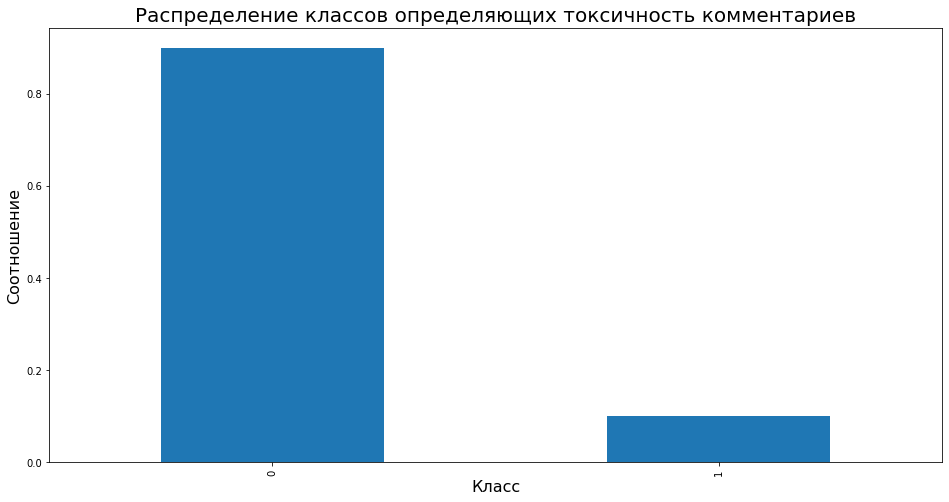

In [6]:
# проверка баланса классов
class_frequency = data['toxic'].value_counts(normalize= 2)
print(class_frequency)
class_frequency.plot(kind='bar', figsize = (16,8))
plt.title('Распределение классов определяющих токсичность комментариев', fontsize=20)
plt.ylabel('Соотношение', fontsize=16)
plt.xlabel('Класс', fontsize=16)

В классах заметный дисбаланс, около 90% комментариев не являются токсичными. При обучении учтем этот дисбаланс путем добавления в модель параметра class_weight.

### Предобработка данных

Подготовим данные для векторизации.

* Проведём лемматизацию слов с помощью WordNetLemmatizer() из библиотеки nltk.
* Удалим пунктуацию и лишние пробелы, приведем все к нижнему регистру.
* Разделим данные на тренировочную и тестовую выборки.

In [7]:
# функция для лемматизации
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    word_list = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w) for w in word_list])

In [8]:
# функция для очистки
def clear_text(text):
    return ' '.join(re.sub(r'[^a-z]', ' ',text.lower()) .split())

In [9]:
# копия датасета
df = data.copy()

In [10]:
# получение общей информации о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [11]:
# лемматизация и очистка
df['text'] = df['text'].apply(lemmatization)
df['text'] = df['text'].apply(clear_text)

In [12]:
# получение первого текста датасета
df['text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they were n t vandalism just closure on some gas after i voted at new york dolls fac and please do n t remove the template from the talk page since i m retired now'

In [13]:
# разделение данных
train, test = train_test_split(df, test_size=0.25, random_state=12345, stratify=df['toxic'])

Стратификацию используем для сохранения процентного соотношения целевого класса.

In [14]:
# проверка размеров выборок
print(train.shape)
print(test.shape)

(119678, 2)
(39893, 2)


In [15]:
# создание переменные для признаков и целевого признака
features_train = train.drop(['toxic'], axis=1)
target_train = train['toxic']
features_test = test.drop(['toxic'], axis=1)
target_test = test['toxic']

Проверим как разделение сказалось на балансе классов целевого признака.

<AxesSubplot:title={'center':'Тестовая выборка'}>

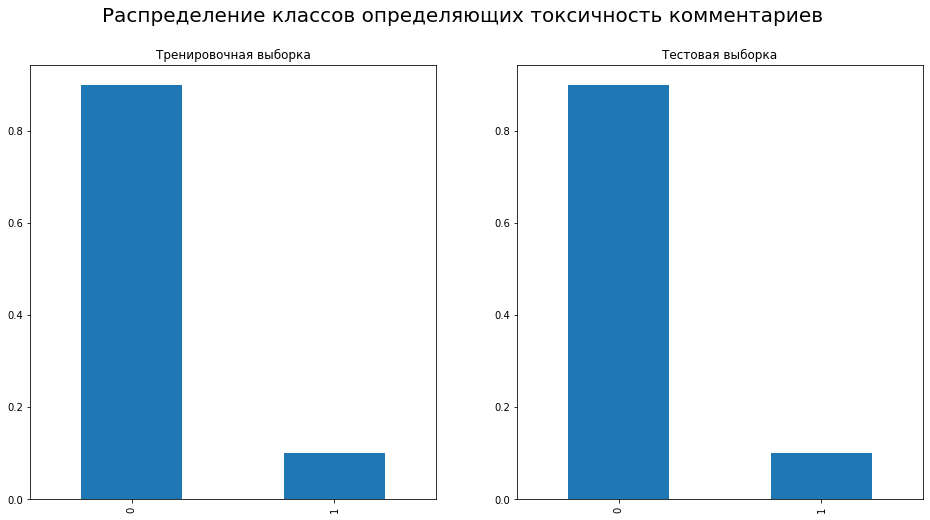

In [16]:
# проверка баланса классов
plt.figure(figsize=(16, 8))
plt.suptitle('Распределение классов определяющих токсичность комментариев', fontsize=20)
plt.subplot(121)
plt.title('Тренировочная выборка')
target_train.value_counts(normalize= 2).plot(kind='bar', figsize = (16,8))

plt.subplot(122)
plt.title('Тестовая выборка')
target_test.value_counts(normalize= 2).plot(kind='bar', figsize = (16,8))

Распределение сохранено.

In [17]:
# векторизация признаков
corpus_train = features_train['text'].values.astype('U')
corpus_test = features_test['text'].values.astype('U')
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords, min_df=3, max_df=0.9)
features_train = count_tf_idf.fit_transform(corpus_train)
features_test = count_tf_idf.transform(corpus_test)

In [18]:
# проверка размеров выборок
print(f"Размер тренировочного датасета: {features_train.shape}")
print(f"Размер тренировочного датасета: {features_test.shape}")

Размер тренировочного датасета: (119678, 40423)
Размер тренировочного датасета: (39893, 40423)


## Обучение

Будем обучать линейные модели, так для деревянных слишком большое признаковое пространство.

In [19]:
# функция для обучения и тестирования
def best_model(model, params, features_train, target_train, features_test, target_test):
    grid = GridSearchCV(model, param_grid = params, cv=4, verbose=True,
                                            scoring = 'f1', n_jobs=-1)
    grid.fit(features_train,target_train)
    predict = grid.predict(features_test)
    return f1_score(target_test, predict)

### LogisticRegression

In [20]:
%time
model_lr = LogisticRegression(random_state=12345, class_weight='balanced')
lr_params = {'C': range (10,15)}
lr = best_model(model_lr, lr_params, features_train, target_train, features_test, target_test)
print(f"Показатель f1 на тестовой выборке: {lr:.3f}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Показатель f1 на тестовой выборке: 0.763


### LinearSVC

In [21]:
%time
model_lsvc = LinearSVC(random_state=12345, class_weight='balanced')
lsvc_params = {'C': range (10,15)}
lsvc = best_model(model_lsvc, lsvc_params, features_train, target_train, features_test, target_test)
print(f"Показатель f1 на тестовой выборке: {lsvc:.3f}")

CPU times: user 11 µs, sys: 9 µs, total: 20 µs
Wall time: 8.34 µs
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Показатель f1 на тестовой выборке: 0.719


## Выводы

In [22]:
models = pd.DataFrame([lr, lsvc], 
             columns=['F1'], 
                      index=['LogisticRegression', 'LinearSVC'])
models

,F1
LogisticRegression,0.762748
LinearSVC,0.719260


Итак, можно сделать вывод, что исходя из данных лучше всего с предсказанием токсичных комментариев справиласть модель логистической регрессии, но были рассмотрены лишь линейные алгоритмы из-за большого числа параметров. Возможно результат был бы иным, если бы количество параметров было меньшее.